# MATH 3350 Course Notes - Module S10 

## The Chi-Square Goodness of Fit (GOF) Test

We have seen the Chi-Square test used to investigate independence of 2 variables.  The same test can be used to see if a set of data differs significantly from a specific distribution.

### Example 1. Discrete Distribution with Equal Probabilities: A Fair Die?

We know that a fair 6-sided die should land on each of its six values $\frac{1}{6}$ of the time in the long run. In other words, the **distribution** for a fair die roll is: 

Outcome | Probability
--------|------------
1 | $\frac{1}{6}$
2 | $\frac{1}{6}$
3 | $\frac{1}{6}$
4 | $\frac{1}{6}$
5 | $\frac{1}{6}$
6 | $\frac{1}{6}$

(_Notice that, as we saw in the Probability Modules, all of the probabilities in the event space should add to 1._) 

Suppose we have rolled one particular die many times, and it seems as if it lands on 1 and 2 a lot, and lands on 5 and 6 much less. We wonder if there is evidence that the die is **_not fair_** (i.e., evidence that this die is not following the distribution above.)  

We can roll the die many times and record the results, such as the following example with a total of 600 rolls:

Outcome | Frequency
--------|------------
1 | 132
2 | 121
3 | 98
4 | 104
5 | 74
6 | 71

These are **_observed counts_**. the As we saw in our previous experience with chi-square, each outcome has an **_expected count_** based on the specified distribution. The $\chi^2$ statistic is a measure of how much the observed counts differ from the expected counts.  The larger the $\chi^2$, the stronger the evidence that the data do **_not_** follow the distribution.  

#### Hypotheses

In general, the hypotheses of a chi-square test are:


<center>
$H_0$: The observed data follow the designated distribution.
</center>
<center>
$H_a$: The observed data do not follow the designated distribution.
</center>

If the $\chi^2$ statistic is sufficiently large, we will reject our null hypothesis.

#### Conditions for the $\chi^2$ GOF Test

Every expected count in the test must be **_at least 5_**.  

Here are our expected and observed counts: 

Outcome | Expected | Observed
--------|-----------|--------
1 | 100 | 132
2 | 100 | 121
3 | 100 | 98
4 | 100 | 104
5 | 100 | 74
6 | 100 | 71

The condition is easily met for this data set.

#### Computing the $\chi^2$ Statistic

The chi-square statistic is computed as follows:  

<center>
$\chi^2 = \sum_1^k {\frac{\left(O_i - E_i\right )^2}{E_i}} $
</center>

where $k$ represents the number of outcomes, $O_i$ represents the observed count for each outcome, and $E_i$ represents the corresponding expected count.  Notice that there is one chi squared term for each outcome. For our example, the calculation would be as follows:  

Outcome | Expected | Observed | Calculation | Chi-Square term 
--------|-----------|--------|------------------|----------
1 | 100 | 132 | $\frac{\left(132-100\right)^2}{100}$ | 10.24 
2 | 100 | 121 | $\frac{\left(121-100\right)^2}{100}$ | 4.41
3 | 100 | 98 | $\frac{\left(98-100\right)^2}{100}$ | 0.04
4 | 100 | 104 | $\frac{\left(104-100\right)^2}{100}$ | 0.16
5 | 100 | 74 | $\frac{\left(74-100\right)^2}{100}$ | 6.76
6 | 100 | 71 | $\frac{\left(71-100\right)^2}{100}$ | 8.41

The sum of the $\chi^2$ terms is $30.02$

The statistic in the GOF test is the $\chi^2$ distribution with $k-1$ degrees of freedom, where $k$ is the number of outcomes.  Therefore, the p-value for this test can be found using the $\chi^2$ distribution with $df = 5$.

In [ ]:
#Visualize our result on the chi-square distribution with df=5

xvalues <- seq(0,35,0.1)     
yvalues <- dchisq(xvalues, df=1)

plot (xvalues,yvalues, main="PDF of Chi-Square Distribution, df=5", 
      xlab="Chi-Square Statistic", ylab="Density", type="l")

#Add a line to show where the chi-square value of our sample is
abline(v=30.02, lty=2, col="red")

In [ ]:
# Find p-value for Chi-Square GOF Test

pval <- pchisq(30.02, df=5, lower.tail=FALSE)
pval

#### Conclusion
We reject $H_0$. The highly significant result provides strong evidence that the observed die rolls do not follow the distribution of a fair die. 

### R's Built-In Chi-Square Test 
R's chi.square function will perform this same test, given a vector of observed counts and a vector of distribution probabilities, as shown below.

In [ ]:
#Set up vectors for observed counts and distribution probabilities

observed <- c(132, 121, 98, 104, 74, 71)
probs <- rep(1/6, 6)  #This is a quick way to define a vector when all the values are the same
probs

In [ ]:
#Perform R's chi-square test

cs_test <- chisq.test(x = observed, p = probs)
cs_test

In [ ]:
#Some individual components stored in test result

cs_test$expected

cs_test$observed

cs_test$parameter

cs_test$p.value

### Example 2. Genetics

Chi square tests are often used to investigate whether genetic characteristics follow an expected distribution. Two genetic characteristics of different corn varieties are kernel color (yellow or purple) and kernel texture (smooth or "shrunken").  


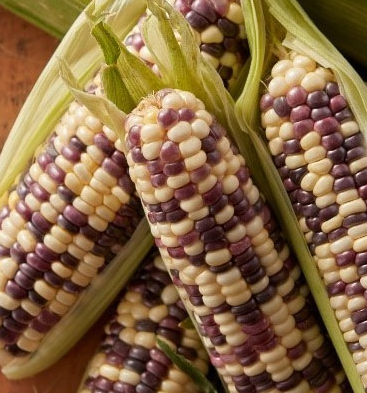

According to genetic analysis, a specific hybrid of certain corn breeds (we'll call it Hybrid Q) should have the following distribution of kernel types:  

Type | Probability
-----|------------
Purple smooth | $\frac{9}{16}$
Purple shrunken | $\frac{3}{16}$
Yellow smooth | $\frac{3}{16}$
Yellow shrunken | $\frac{1}{16}$

Suppose a random sample of corn is taken from a crop, consisting of 1528 kernels in total.  The type of each kernel is recorded, with the following results: 

Type | Number of Kernels
-----|------------
Purple smooth | $841$
Purple shrunken | $279$
Yellow smooth | $317$
Yellow shrunken | $91$ 

Do these sample data provide evidence that the crop is not Hybrid Q?  

##### Hypotheses

<center>
$H_0$: The corn crop follows the genetic distribution of characteristics in Hybrid Q.
</center>
<center>
$H_a$: The corn crop does not follow the genetic distribution of characteristics in Hybrid Q.
</center>


In [ ]:
observed <- c(841,279,317,91)
probs <- c(9/16, 3/16, 3/16, 1/16)

cs_test <- chisq.test(x = observed, p = probs)
cs_test

This result is not significant.  There is not sufficient evidence that the distribution of the crop's genetic characteristics differ from those of Hybrid Q.

### Extending GOF to Theoretical Distributions

Another common use for the GOF Test is to determine if a sample data set is a reasonable fit of a known theoretical distribution. If the $\chi^2$ Test produces a significant result, the data **_do not_** fit the distribution.  Otherwise, the data are assumed to be a reasonable fit.

Here we will introduce a sample of z-scores for a test given to 1000 students. It is often assumed that _all_ z-scores are normally distributed, but this is not the case: The distribution of the z-scores will be related to the distribution of the underlying data, as the example below shows.

In [ ]:
#Generate random exponentially distributed data
expData <- rexp(100)
hist(expData, main="Sample of Exponentially Distributed Data")

#Compute z-scores for this data set
expMean <- mean(expData)
expSD <- sd(expData)
exp_z <- (expData - expMean)/expSD
hist(exp_z, main="z-Scores of Exponentially Distributed Data")

#### Examine Our z-Score Data Set
Given that z-scores do not not automatically follow a normal distribution, we want to examine our data set of z-scores.  Often, a histogram is sufficient to demonstrate that data are not normally distributed, so that's a good place to start.  We load the data set below and view the distribution of z-scores.

In [ ]:
mystery <- read.csv("MysteryData.csv")
head(mystery)

In [ ]:
zscores <- mystery$z
hist(zscores)

The histogram seems to have many features of the standard normal distribution (unimodal, symmetric, centered at zero, most values within 3 s.d. of center.) This is an occasion where a GOF test would be useful.

##### Hypotheses

<center>
$H_0$: The scores follow the Standard Normal distribution.
</center>
<center>
$H_a$: The scores do not follow the Standard Normal distribution.
</center>

### Important Tweaks for GOF on Theoretical Distributions

#### Binning

Our first two examples used a simple discrete distribution with a limited number of possible outcomes. The normal distribution is not discrete and has an infinite number of possible outcomes. Therefore, the GOF test requires that we define **_bins_**, where each bin has a range of outcomes. 

##### Choosing Bins
If there are too few bins, the test will not be sensitive enough (e.g., 2 bins would place 50% of the data above 0 and 50% below, but that would not be sufficient to establish normality.)  Too many bins could make the test too sensitive.  The bins also need to be chosen so that the **_expected counts_** will all be above 5. For our test we will use the following bins:

Bin | Range of Values
----|----------------
1 | $\left(-\infty,-2.5 \right ]$
2 | $\left(-2.5, -1.5 \right ]$
3 | $\left(-1.5, -0.5 \right ]$
4 | $\left(-0.5, 0.5 \right ]$
5 | $\left(0.5, 1.5 \right ]$
6 | $\left(1.5, 2.5 \right ]$
7 | $\left(2.5, \infty \right ]$

#### Degrees of Freedom

The second aspect of the GOF test for a theoretical distribution is adjusting the degrees of freedom to account for the number of parameters that define the distribution.  Whereas the degrees of freedom was $k-1$ for a simple discrete probability model, it is $k-d-1$ for a theoretical distribution, where $k$ is the number of bins and $d$ is the number of parameters needed to define the distribution.  A normal distribution is defined by its mean and variance (two parameters), so for this example, $d=2$ and $k-d-1 = 7-2-1 = 4$.

### Leveraging R's Chi-Square Test
R's Chi-Square test assumes a simple discrete probability distribution, so it uses the wrong degrees of freedom.  However, it is still useful for quickly calculating the $\chi^2$ statistic. Then the p-value for that statistic can be found using the $\chi^2$ distribution with the correct degrees of freedom. This is the approach taken below.

In [ ]:
#Define bins (-Inf, -2.5], (-2.5,-1.5], (-1.5, -0.5], (-0.5,0.5], (0.5,1.5], (1.5,2.5], (2.5,Inf]
boundary <- seq(-2.5,2.5,1)
boundary

In [ ]:
#Define probability for each bin/interval

probs <- c()
probs[1] <- pnorm(-2.5)

for (i in 2:6) {
    probs[i] <- pnorm(boundary[i]) - pnorm(boundary[i-1])
}
probs[7] <- pnorm(2.5, lower.tail=FALSE)

probs
sum(probs)

In [ ]:
#Obtain observed counts in each interval

observed <- c()

for (i in 1:6) {
    observed[i] <- sum(zscores <= boundary[i]) - sum(observed)
}

observed[7] <- sum(zscores > boundary[6])

observed
sum(observed)

In [ ]:
#Run packaged chi-squared (will not use appropriate df, but will compute correct chi-square statistic)

cs_test <- chisq.test(observed, p=probs)
cs_test

In [ ]:
#Adjust degrees of freedom to obtain corrected p-value
adjusted_df <- 4
adjusted_pval <- pchisq(570.69, df=adjusted_df, lower.tail=FALSE)

adjusted_pval

#### Interpretation

The p-value is extremely small (even before adjusting the degrees of freedom). The results strongly suggest that these scores are **_not_** from the standard normal distribution.

##### Follow-up

It is also useful to directly compare the observed and expected counts to see how the scores differ from what we would expect to see in a normal distribution. This is done below. (_It's also a good idea to check the expected counts to verify that none of them are below 5._)

In [ ]:
#Explicitly compare observed and expected counts
observed
round(cs_test$expected,2)